# Física Experimental III - Experimento I

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.stats import chisquare, ttest_ind

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Flatten

## Circuito I - Voltímetro

In [ ]:
R  = 3.7E6  # Valor da resitência
sR = 0.1E6  # Incerteza da resistência

In [ ]:
# Carrega dados do circuito 1
dados_1 = pd.read_csv('voltimetro.txt', sep='\t')

In [ ]:
# Calcula correntes
#dados_1['sVoltimetro']  = np.zeros(dados_1.shape[0]) + 0.1
dados_1['sVoltimetro']  = dados_1['Voltimetro'] * 0.01 + 0.03
dados_1['sFonte']       = np.zeros(dados_1.shape[0]) + 0.1
dados_1['DTensao']      = dados_1['Fonte'] - dados_1['Voltimetro']
dados_1['sDTensao']     = np.sqrt( dados_1['sVoltimetro']**2 + dados_1['sFonte']**2 )
dados_1['Corrente']     = dados_1['DTensao'] / R
dados_1['sCorrente']    = np.sqrt( ( dados_1['sDTensao'] / R )**2 + ( dados_1['DTensao'] * sR / R**2 )**2 )

In [2]:
def fit1(x, a, b): return a*x + b

In [ ]:
popt, pcov = curve_fit(fit1, xdata=dados_1['Corrente'], ydata=dados_1['Voltimetro'])

In [ ]:
print('PARAM\tVALUE\tUNCERTAINTY')
for i,p in enumerate(popt):
  print('[{}]:\t{}\t{}'.format(i, p, np.sqrt(pcov[i][i])))

PARAM	VALUE	UNCERTAINTY
[0]:	13216771.797524335	82587.85538909104
[1]:	0.16933895191819853	0.057756125258879076


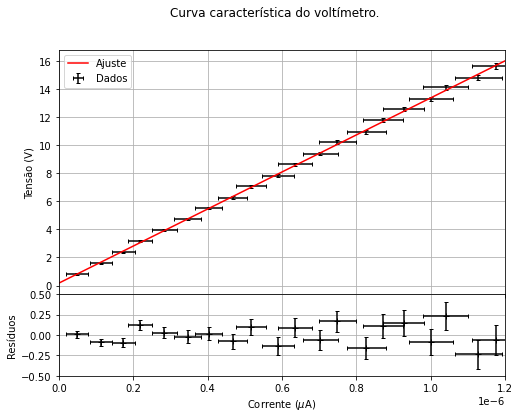

In [ ]:
fig, axs = plt.subplots(2, figsize=(8,6), sharex=True, gridspec_kw={ 'hspace': 0, 'height_ratios': (3, 1) })
plt.suptitle('Curva característica do voltímetro.')

axs[0].errorbar(
    x=dados_1['Corrente'], y=dados_1['Voltimetro'],
    xerr=dados_1['sCorrente'], yerr=dados_1['sVoltimetro'],
    capsize=2, capthick=1,
    color='black', label='Dados', fmt=' '
)

x = np.linspace(0, 1.2E-6, 10)
axs[0].plot(x, fit1(x, popt[0], popt[1]), c='red', label='Ajuste')

axs[0].set_ylabel('Tensão (V)')
axs[0].grid()
axs[0].legend()

axs[1].errorbar(
    x=dados_1['Corrente'],
    y=(dados_1['Voltimetro'] - fit1(dados_1['Corrente'], popt[0], popt[1])),
    xerr=dados_1['sCorrente'], yerr=dados_1['sVoltimetro'],
    capsize=2, capthick=1,
    color='black', marker='+', fmt=' '
    )

axs[1].set_xlabel('Corrente ($\mu$A)')
axs[1].set_ylabel('Resíduos')
axs[1].grid()
axs[1].set_ylim(-0.5, 0.5)

plt.xlim(0, 1.2E-6)

plt.savefig('voltimetro.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

In [ ]:
np.sum(((dados_1['Voltimetro'] - fit1(dados_1['Corrente'], popt[0], popt[1])) / dados_1['sVoltimetro'])**2)

23.81751152290647

## Circuito II - Amperímetro

In [3]:
R = 48.2, 0.01

In [4]:
dados_2 = pd.read_csv('amperimetro.txt', sep='\t')

In [5]:
# Incertezas
dados_2['sVoltagem'] = np.zeros(dados_2.shape[0]) + 0.01
dados_2['sCorrente'] = np.zeros(dados_2.shape[0]) + 0.01
dados_2['Amperimetro'] = dados_2['Voltagem'] - R[0] * dados_2['Corrente'] # + np.random.normal(loc=0, scale=0.05, size=dados_2.shape[0])
dados_2['sAmperimetro'] = np.sqrt( dados_2['sVoltagem']**2 + (R[1] * dados_2['Corrente'])**2 + (dados_2['sCorrente'] * R[0])**2 )

In [6]:
dados_2 = dados_2.drop([ 0, 2, 4, 5 ])

In [12]:
dados_2

,Voltagem,Corrente,sVoltagem,sCorrente,Amperimetro,sAmperimetro
1,1.5,0.03,0.01,0.01,0.054,0.482104
3,2.5,0.05,0.01,0.01,0.090,0.482104
6,4.0,0.08,0.01,0.01,0.144,0.482104
7,4.5,0.09,0.01,0.01,0.162,0.482105
8,5.0,0.10,0.01,0.01,0.180,0.482105
9,5.5,0.11,0.01,0.01,0.198,0.482105
10,6.0,0.12,0.01,0.01,0.216,0.482105
11,6.5,0.13,0.01,0.01,0.234,0.482105
12,7.0,0.14,0.01,0.01,0.252,0.482106
13,7.5,0.15,0.01,0.01,0.270,0.482106


In [7]:
popt, pcov = curve_fit(
    fit1,
    xdata=dados_2['Corrente'],
    ydata=dados_2['Amperimetro']
)

In [8]:
print('PARAM\tVALUE\tUNCERTAINTY')
for i,p in enumerate(popt):
  print('[{}]:\t{}\t{}'.format(i, p, np.sqrt(pcov[i][i])))

PARAM	VALUE	UNCERTAINTY
[0]:	1.799999994627683	5.556384894375844e-09
[1]:	1.056978085637054e-09	3.3372310853641967e-10


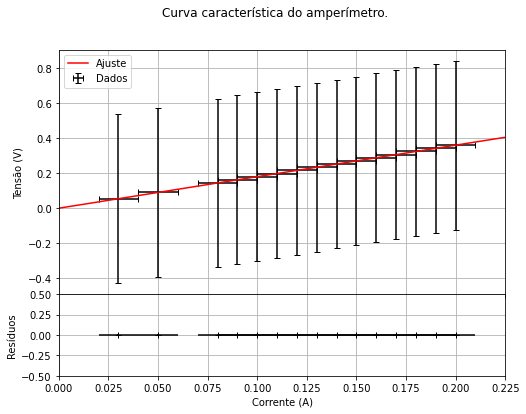

In [9]:
fig, axs = plt.subplots(2, figsize=(8,6), sharex=True, gridspec_kw={ 'hspace': 0, 'height_ratios': (3, 1) })
plt.suptitle('Curva característica do amperímetro.')

axs[0].errorbar(
    x=dados_2['Corrente'],
    y=dados_2['Amperimetro'],
    xerr=dados_2['sCorrente'], yerr=dados_2['sAmperimetro'],
    color='black', label='Dados', fmt=' ', capsize=3, capthick=1
)

x = np.linspace(0, 0.3, 10)
axs[0].plot(x, fit1(x, popt[0], popt[1]), c='red', label='Ajuste')

axs[0].set_ylabel('Tensão (V)')
axs[0].grid()
axs[0].legend()

axs[1].errorbar(
    x=dados_2['Corrente'],
    y=dados_2['Amperimetro'] - fit1(dados_2['Corrente'], popt[0], popt[1]),
    xerr=dados_2['sCorrente'], yerr=dados_2['sVoltagem'],
    color='black', marker='+', fmt=' '
    )

axs[1].set_xlabel('Corrente (A)')
axs[1].set_ylabel('Resíduos')
axs[1].grid()
axs[1].set_ylim(-1, 1)

axs[1].set_ylim(-0.5, 0.5)

plt.xlim(0, 0.225)

plt.savefig('amperimetro.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

In [10]:
chisq = np.sum(((dados_2['Amperimetro'] - fit1(dados_2['Corrente'], popt[0], popt[1])) / dados_2['sAmperimetro'])**2)

In [11]:
print('chi2:\t{:.2f}\nchi2r:\t{:.2f}'.format(chisq, chisq / (dados_2.shape[0] - 2)))

chi2:	0.00
chi2r:	0.00


In [ ]:
R_tot = popt[0], np.sqrt(pcov[0][0])

In [ ]:
R_amp = R_tot[0] - R[0], np.sqrt( R[1]**2 + R_tot[1]**2 )

In [ ]:
print('R_amp:\t{}\t{}'.format(R_amp[0], R_amp[1]))

R_amp:	-46.397752677780865	0.2657447713364699


In [ ]:
 z = (0 - R_amp[0]) / R_amp[1]

In [ ]:
print(z)

174.59516680023347
